In [1]:
import pandas as pd

#lib for math calcs
import numpy as np

#lib to plot datas
import seaborn as sns
import matplotlib.pyplot as plt

#lib to ignore warnings during codes
from warnings import filterwarnings

Matplotlib is building the font cache; this may take a moment.


In [5]:
#reading dataset

db_insuranceDf = pd.read_excel('insurance-database.xlsx', 'main-database')
display(db_insuranceDf.head(10))

,Id Client,Ages,Insurance Price,Zip Code,Service,Desc_service
0,1,69,3930,19005,3,Theft
1,2,27,3336,19027,1,Did no use
2,3,49,3936,19001,3,Theft
3,4,60,157,19009,1,Did no use
4,5,51,3998,19050,2,Used service
5,6,44,3780,19007,3,Theft
6,7,36,823,19025,1,Did no use
7,8,77,3983,19008,3,Theft
8,9,40,427,19008,1,Did no use
9,10,32,891,19020,1,Did no use


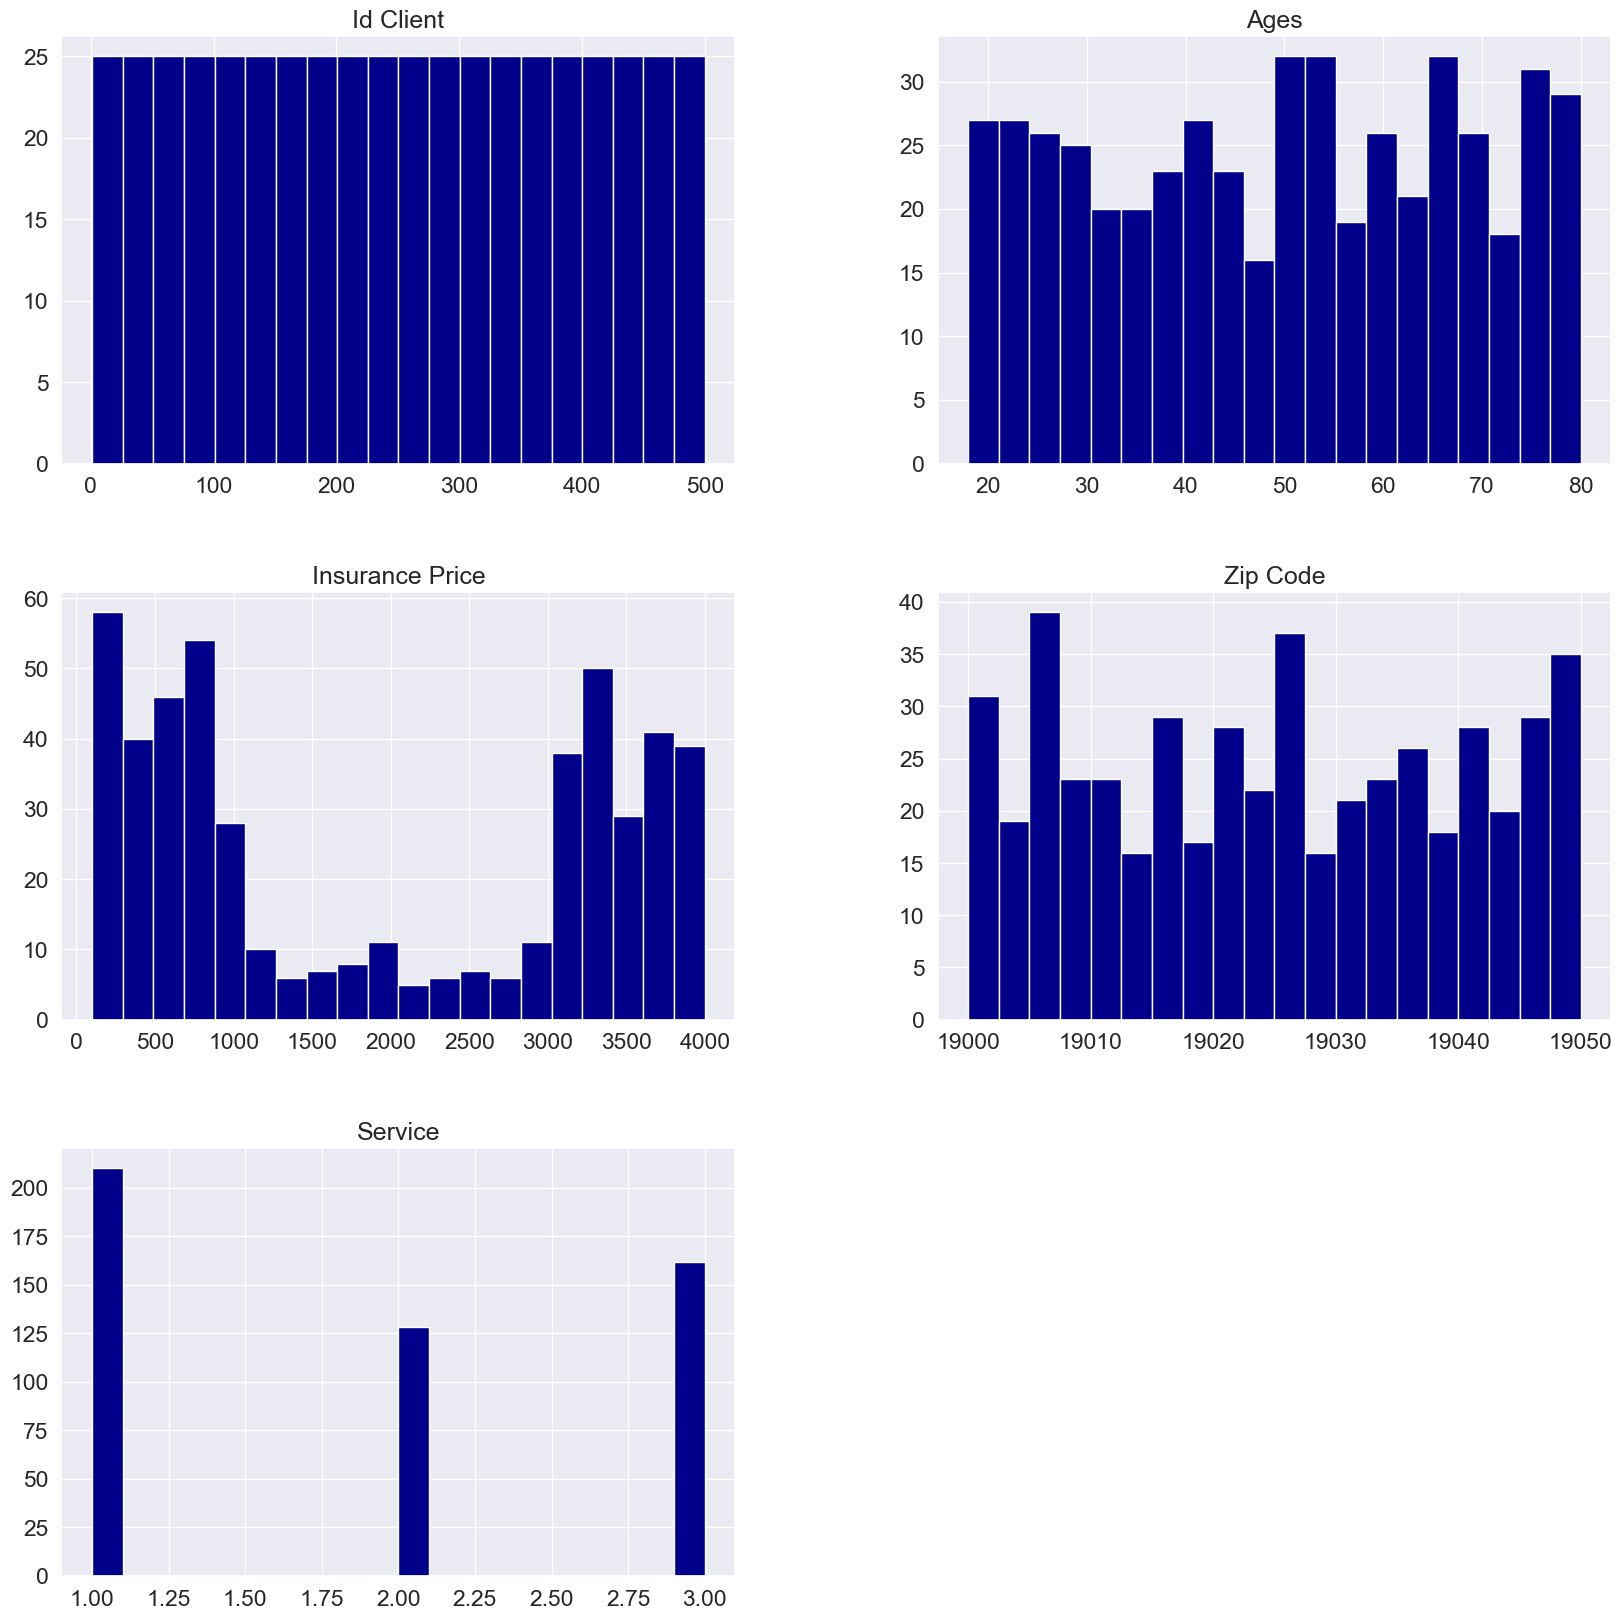

In [ ]:
sns.set_theme( font_scale=1.5, rc={'figure.figsize':(20,20)})
axis = db_insuranceDf.hist(bins=20, color='darkblue')

<Axes: xlabel='Service', ylabel='Ages'>

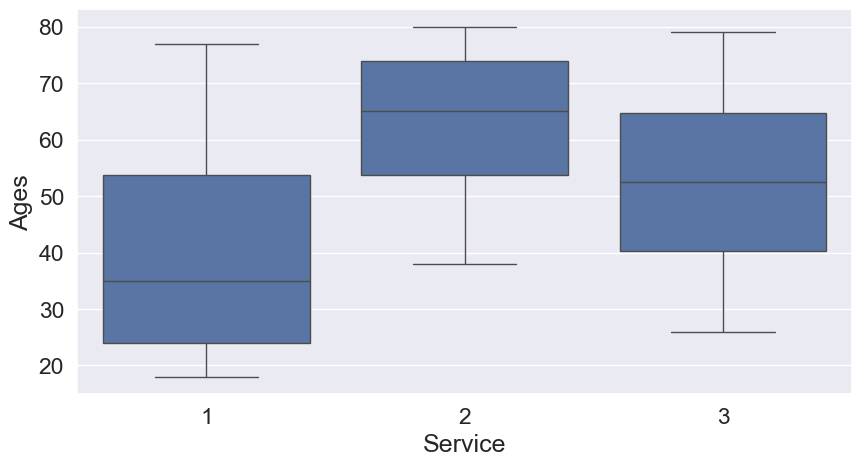

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=db_insuranceDf, x='Service', y='Ages')
# sns.boxplot(data=db_insuranceDf, x='Desc_service', y='Ages')

#the box plot graphic looks like .describe()

# Analisando o tipo de servico mais usado de acordo com as idades
# As pessoas com menos idades 'nao usam' muito o servico

<Axes: xlabel='Service', ylabel='Insurance Price'>

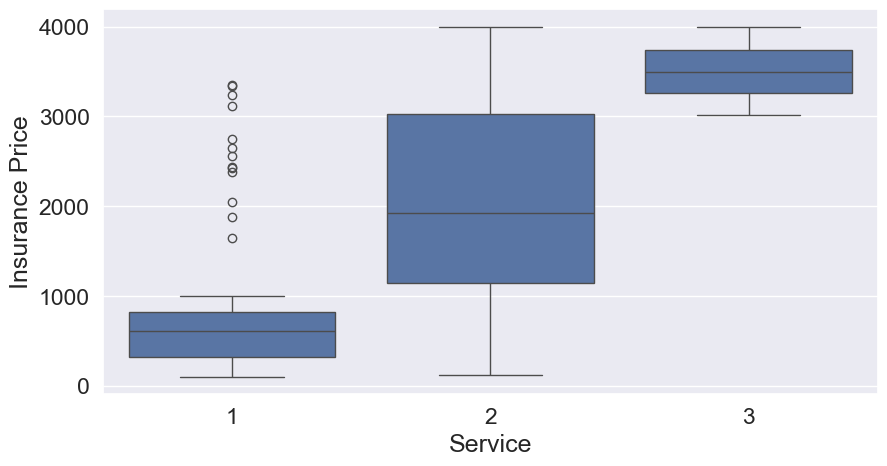

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=db_insuranceDf, x='Service', y='Insurance Price')

# Analisando a afluencia dos servicos de acordo com o preco do seguro

<Axes: xlabel='Service', ylabel='Zip Code'>

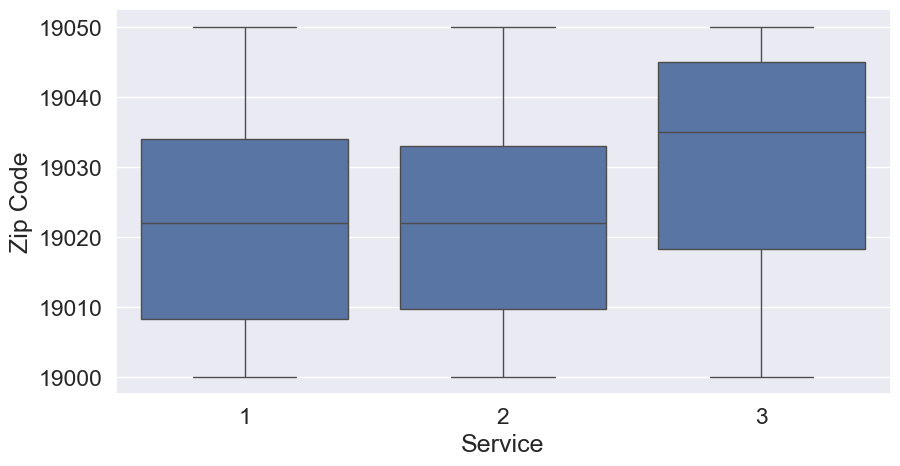

In [ ]:
# de acordo com o zip code
#afluencia dos servicos de acordo com as zonas

plt.figure(figsize=(10,5))
sns.boxplot(data=db_insuranceDf, x='Service', y='Zip Code')

Trainning data

In [ ]:
caracteristics = db_insuranceDf.iloc[:, 1:4].values
predicter = db_insuranceDf.iloc[:, 4:5].values

from sklearn.model_selection import train_test_split

#testers 

x_trainer, x_test, y_trainer, y_test = train_test_split(
    caracteristics,
    predicter,
    test_size=0.30,
    random_state=10
)

print(len(db_insuranceDf))
print(len(x_trainer))
print(len(x_test))

500
350
150


In [7]:
#importing the random florest
from sklearn.ensemble import RandomForestClassifier

algorithm_random_florest = RandomForestClassifier(n_estimators=500)

# aplicar todas as formulas no conjunto de dados
algorithm_random_florest.fit(x_trainer, y_trainer)


c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,n_estimators,500
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


[[61  1  2]
 [ 7 25  9]
 [ 0  1 44]]


<Axes: >

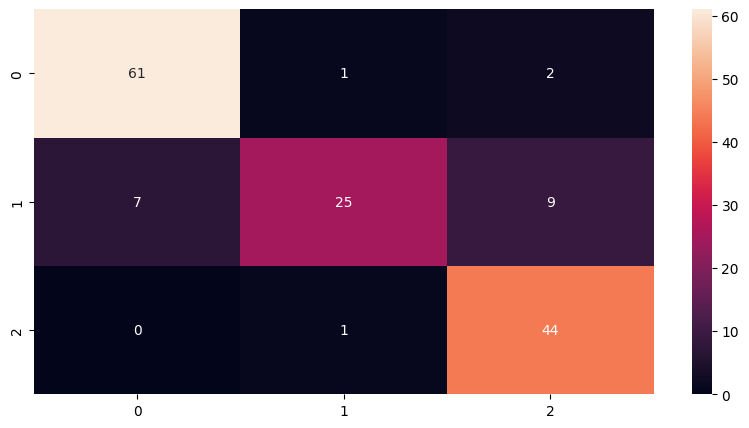

In [9]:
# mediar a assertividade do nosso modelo
predicters = algorithm_random_florest.predict(x_test)

from sklearn.metrics import confusion_matrix
matrix_confusion = confusion_matrix(y_test, predicters)
print(matrix_confusion)

plt.figure(figsize=(10,5))
sns.heatmap(matrix_confusion, annot=True)